In [51]:
import pandas as pd
import glob
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

def count_duplicates_in_list(lst):
    # Count occurrences of each element in the list
    element_counts = Counter(lst)
    
    # Count number of elements that occur more than once
    duplicates_count = sum(1 for count in element_counts.values() if count > 1)
    
    return duplicates_count

/tmp/ipykernel_6325/160624306.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [58]:
translation = {"x_0":"Season",
               "x_1":"Year",
               "x_2": "Month",
               "x_3": "Holiday",
               "x_4": "Weekday", 
               "x_5": "Working day",
               "x_6": "Weather Situation",
               "x_7": "Temperature",
               "x_8": "Feeling Temperature",
               "x_9": "Humidity",
               "x_10": "Windspeed"}

def replace_translation(stri, d, reverse):

    for k in sorted(d.keys(), reverse=reverse):
        stri = stri.replace(str(k), str(d[k]))
    return stri

In [79]:
dataset = "bike"

def extract_substrings(text):
    return re.findall(r'func\[(.*?)\]', text)

functions = []
for filename in glob.glob("./results/MOSO/*_SO_bike.csv"):
    nr = filename.split("/")[-1].split("_")[0]
    d_key = "_".join(filename.split("/")[-1].split("_")[1:]).replace(dataset,"").replace(".csv","")
    df = pd.read_csv(filename, sep="\t", header=None)
    
    
    substrings = extract_substrings(df.iloc[0][5])
    if (count_duplicates_in_list(substrings)>0):
        print(substrings[0])
        functions.append(replace_translation(substrings[0], translation, True))
        
    
    


((ln((x_0+-0.664947569))+((x_4+12.040053368)*(0.192557245*x_1)))+((func[((sqrt((x_1+9.726653099))/sqrt((0.216440782/x_7)))*((cos(x_9)+sin(x_6))*sin((-4.181568146-x_9))))
(((sqrt(x_6)+(0.102291934*x_1))+((x_3/x_10)+func[((cos((x_7*-5.384238720))-(sin(x_7)+(0.928246498*x_1)))-((sin(x_6)/(-4.376451969+x_10))*sin((1.421152115-x_0))))
((((x_7+-0.430756062)*(0.838242590*x_3))/(sqrt(81.158164978)+(3.584306955+-12.910718918)))+(sin((x_7*6.896582127))-sin(x_6)))


In [81]:
instance = {"Season":1,
"Year":0,
"Month":1,
"Holiday":0,
"Weekday":6,
"Working day":0,
"Weather Situation":"x",
"Temperature":0.34,
"Feeling Temperature":0.36,
"Humidity": 0.8,
"Windspeed":0.16}

functional = {
    "sin":"np.sin",
    "sqrt":"np.sqrt",
    "cos":"np.cos",
    "ln":"np.log",
    "func[(": "",
    ")]": ""
}

In [83]:
print(functions[2])
function = replace_translation(functions[2], instance, False)
function = replace_translation(function, functional, False)

((((Temperature+-0.430756062)*(0.838242590*Holiday))/(sqrt(81.158164978)+(3.584306955+-12.910718918)))+(sin((Temperature*6.896582127))-sin(Weather Situation)))


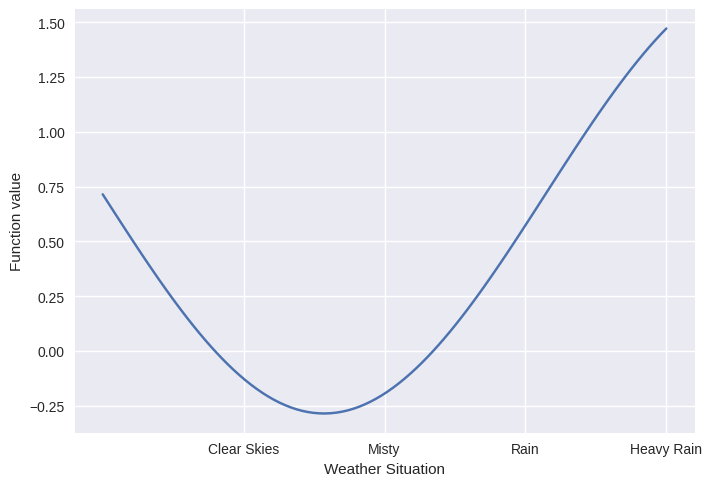

In [84]:
func = lambda x: eval(function)
x = np.linspace(0,4,100)
y = func(x)
plt.figure()
plt.xlabel("Weather Situation")
xtick_locations = [1,2,3,4]
xtick_labels = ["Clear Skies", "Misty", "Rain", "Heavy Rain"]
plt.xticks(xtick_locations, xtick_labels)
plt.ylabel("Function value")
plt.plot(x,y)
plt.show()

In [1]:
import scikit_posthocs as sp
import numpy as np

In [12]:


hv_list = {}
hv_list["poop"] = [[0.1,0.11,0.13]]
hv_list["poop2"] = [[0.1,0.14,0.12]]
print([hv_list[k][0] for k in sorted(list(hv_list.keys()))])
x = sp.posthoc_wilcoxon([hv_list[k][0] for k in sorted(list(hv_list.keys()))], p_adjust="Holm")
print(x)

[[0.1, 0.11, 0.13], [0.1, 0.14, 0.12]]
          1         2
1  1.000000  0.654721
2  0.654721  1.000000


/home/joe/.local/lib/python3.10/site-packages/scipy-1.11.1-py3.10-linux-x86_64.egg/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/joe/.local/lib/python3.10/site-packages/scipy-1.11.1-py3.10-linux-x86_64.egg/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
